## 🏏 IPL 2025 Exploratory Data Analysis (EDA)

Overview
This project explores IPL 2025 player performance data to uncover batting & bowling trends, identify top performers, and extract fantasy cricket insights.

The IPL has evolved into a fast-paced, high-strike-rate game — batsmen dominate with aggressive intent, while bowlers fight back with skill and precision.

⸻ Dataset • Rows: 156 players • Columns: 14 features (Runs, Matches, SR, AVG, 100s, 50s, 4s, 6s, etc.) + bowling dataset • Covers both batting & bowling stats from IPL 2025.



In [1]:
#Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Reading DataFrome 
df = pd.read_csv('IPL2025Batters.csv')
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [3]:
#Sets the default figure size and adds grid
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
df.columns

Index(['Player Name', 'Team', 'Runs', 'Matches', 'Inn', 'No', 'HS', 'AVG',
       'BF', 'SR', '100s', '50s', '4s', '6s'],
      dtype='object')

In [5]:
#Checking size of the data and datatypes
print('--'*15)
print('(Rows , Columns)' , df.shape) 
print('--'*15)
df.info()

------------------------------
(Rows , Columns) (156, 14)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB


In [6]:
df.isna().sum()

Player Name    0
Team           0
Runs           0
Matches        0
Inn            0
No             0
HS             0
AVG            0
BF             0
SR             0
100s           0
50s            0
4s             0
6s             0
dtype: int64

In [7]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [8]:
#Cleaning data as I have found AVG and HS are object but better to switch as integer

#Remove '*' from HS and convert to int 
df['HS'] = df['HS'].str.replace('*','',regex = False).astype(int)

#Convert AVG to numeric
df['AVG'] = pd.to_numeric(df['AVG'],errors ='coerce')

# Quick Check
df.dtypes

Player Name     object
Team            object
Runs             int64
Matches          int64
Inn              int64
No               int64
HS               int64
AVG            float64
BF               int64
SR             float64
100s             int64
50s              int64
4s               int64
6s               int64
dtype: object

In [9]:
#Overall Statistics
df.describe(include='all')

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
count,156,156,156.000000,156.000000,156.000000,156.000000,156.000000,141.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,156,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sai Sudharsan,CSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,161.320513,9.865385,7.153846,1.634615,40.737179,23.087234,105.673077,134.394103,0.057692,0.916667,14.391026,8.294872
std,NaN,NaN,180.352772,4.757455,4.810142,1.658163,33.637750,15.094148,112.191838,57.237148,0.233912,1.590124,17.778774,9.515500
min,NaN,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,10.750000,6.000000,2.750000,0.000000,8.000000,9.400000,12.000000,100.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,93.500000,11.000000,6.000000,1.000000,37.000000,23.300000,63.500000,140.005000,0.000000,0.000000,7.000000,4.000000
75%,NaN,NaN,254.250000,14.000000,12.000000,3.000000,65.000000,32.750000,164.750000,162.707500,0.000000,1.000000,23.000000,14.000000


In [10]:
# Player who has most runs in an individuals match.
df[df['HS'] == df['HS'].max()]

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,1,2,46,28


In [11]:
# Extacting top 10 players who has hits century in IPL 2025 
top_hundreds = df[df['HS'] >= 100]
top_hundreds

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108,54.21,486,156.17,1,6,88,21
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
8,K L Rahul,DC,539,13,13,3,112,53.90,360,149.72,1,3,52,21
11,Heinrich Klaasen,SRH,487,13,13,2,105,44.27,282,172.69,1,1,42,25
12,Priyansh Arya,PBKS,475,17,17,0,103,27.94,265,179.24,1,2,55,25
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,1,2,46,28
23,Ishan Kishan,SRH,354,14,13,3,106,35.40,232,152.58,1,1,33,15
36,Rishabh Pant,LSG,269,14,13,2,118,24.45,202,133.16,1,1,23,16
39,Vaibhav Suryavanshi,RR,252,7,7,0,101,36.00,122,206.55,1,1,18,24


In [12]:
# Top 10 players who has faced most balls
most_balls = df.sort_values(by='BF', ascending = False).head(10)
most_balls

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108,54.21,486,156.17,1,6,88,21
2,Virat Kohli,RCB,657,15,15,3,73,54.75,454,144.71,0,8,66,19
1,Surya Kumar Yadav,MI,717,16,16,5,73,65.18,427,167.91,0,5,69,38
3,Shubman Gill,GT,650,15,15,2,93,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
8,K L Rahul,DC,539,13,13,3,112,53.90,360,149.72,1,3,52,21
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28
5,Shreyas Iyer,PBKS,604,17,17,5,97,50.33,345,175.07,0,6,43,39
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30
9,Jos Buttler,GT,538,14,13,4,97,59.78,330,163.03,0,5,52,24


In [13]:
# Players with most Runs
top_runs = df.sort_values('Runs', ascending = False).head(10)
top_runs[['Player Name', 'Runs', 'Matches', 'HS', 'SR']]

,Player Name,Runs,Matches,HS,SR
0,Sai Sudharsan,759,15,108,156.17
1,Surya Kumar Yadav,717,16,73,167.91
2,Virat Kohli,657,15,73,144.71
3,Shubman Gill,650,15,93,155.87
4,Mitchell Marsh,627,13,117,163.70
5,Shreyas Iyer,604,17,97,175.07
6,Yashasvi Jaiswal,559,14,75,159.71
7,Prabhsimran Singh,549,17,91,160.52
8,K L Rahul,539,13,112,149.72
9,Jos Buttler,538,14,97,163.03


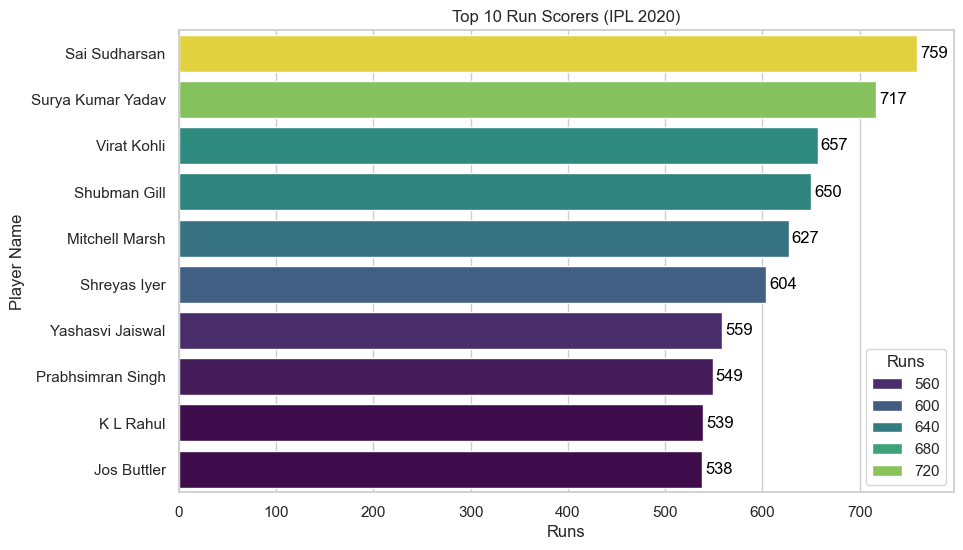

In [14]:
#TOP 10 RUN SCORES
ax = sns.barplot(x="Runs", y = "Player Name",data = top_runs, palette="viridis",hue='Runs')
for i, v in enumerate(top_runs.sort_values("Runs", ascending=False)["Runs"]):
    ax.text(v + 3, i, str(v), color="black", va="center")
plt.title("Top 10 Run Scorers (IPL 2020)")
plt.show()

<Axes: xlabel='AVG', ylabel='Count'>

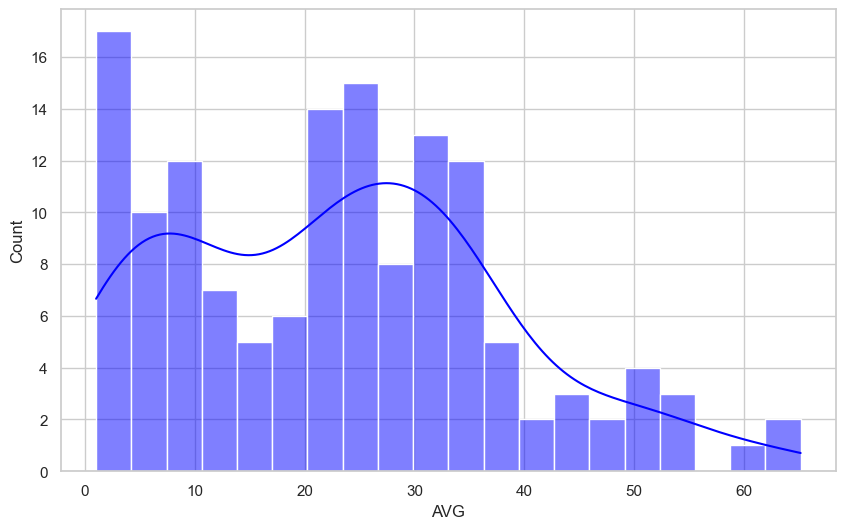

In [15]:
# Distribution of Batting Average
sns.histplot(df['AVG'].dropna(), bins= 20, kde=True,color ='blue')

In [16]:
# Most 50s player
most_50s = df.sort_values(by = '50s', ascending = False).head(10)
most_50s[['Player Name', 'Runs', '50s']]

,Player Name,Runs,50s
2,Virat Kohli,657,8
0,Sai Sudharsan,759,6
3,Shubman Gill,650,6
4,Mitchell Marsh,627,6
6,Yashasvi Jaiswal,559,6
5,Shreyas Iyer,604,6
1,Surya Kumar Yadav,717,5
9,Jos Buttler,538,5
10,Nicholas Pooran,524,5
13,Aiden Markram,445,5


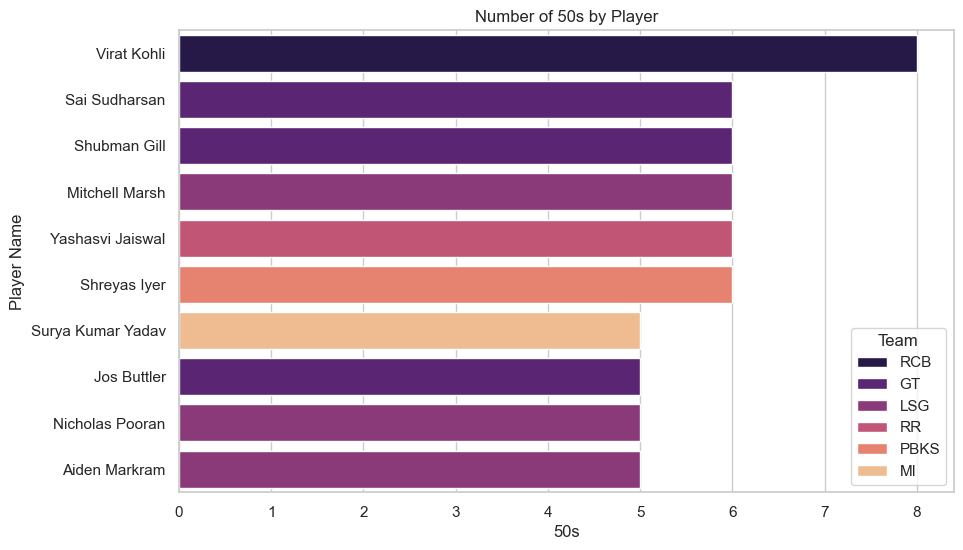

In [17]:
sns.barplot(x='50s',y='Player Name',data=most_50s,hue='Team',palette='magma')
plt.title("Number of 50s by Player")
plt.show()

Text(0.5, 1.0, 'Runs vs Strike Rate (by team)')

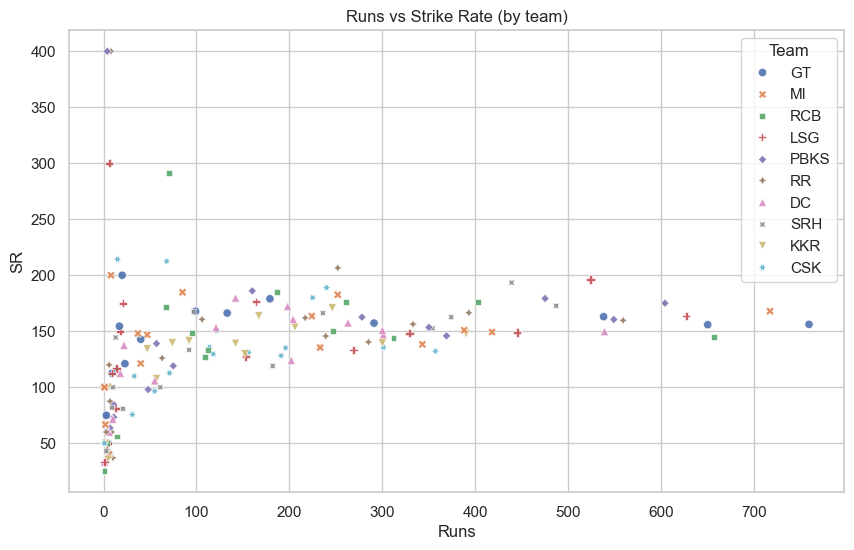

In [18]:
# Compairsion of Runs with Strike Rate
sns.scatterplot(data = df, x='Runs', y = 'SR', hue ='Team',style = 'Team',alpha = 0.9)
plt.title("Runs vs Strike Rate (by team)")

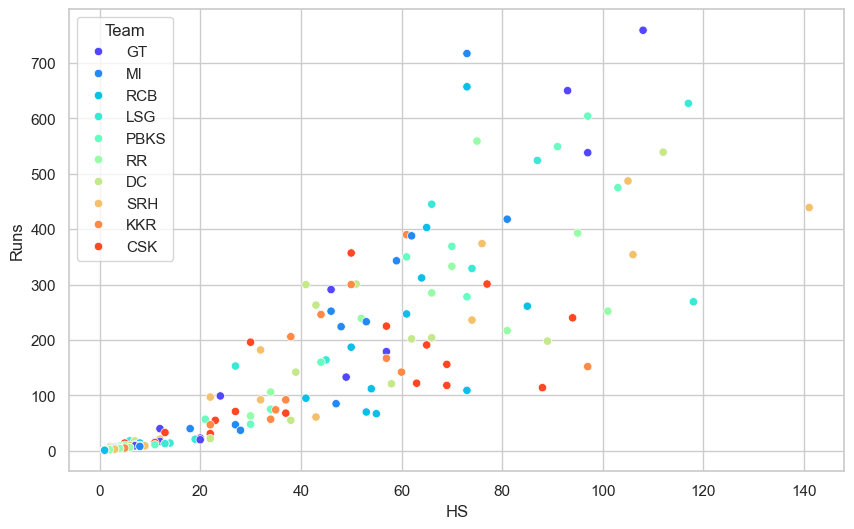

In [19]:
# High Score Vs Runs
sns.scatterplot(x='HS', y ='Runs', data =df ,hue='Team',palette ='rainbow')
plt.show()

In [20]:
# Creating a new column for anlyzing performance on weighted combination
# Fantasy Players
df['Impact_Score'] = (
    df['Runs'] *0.5 +
    df['SR']*0.3 +
    df['50s'] *0.1 +
    df['100s']*0.25)

In [21]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s,Impact_Score
0,Sai Sudharsan,GT,759,15,15,1,108,54.21,486,156.17,1,6,88,21,427.201
1,Surya Kumar Yadav,MI,717,16,16,5,73,65.18,427,167.91,0,5,69,38,409.373
2,Virat Kohli,RCB,657,15,15,3,73,54.75,454,144.71,0,8,66,19,372.713
3,Shubman Gill,GT,650,15,15,2,93,50.00,417,155.87,0,6,62,24,372.361
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,363.460


In [22]:
# Top 10 Fantasy Players 
top_player = df.sort_values(by='Impact_Score',ascending = False).head(10)
top_player[["Player Name", "Team", "Runs", "SR", "50s", "100s", "Impact_Score"]]

,Player Name,Team,Runs,SR,50s,100s,Impact_Score
0,Sai Sudharsan,GT,759,156.17,6,1,427.201
1,Surya Kumar Yadav,MI,717,167.91,5,0,409.373
2,Virat Kohli,RCB,657,144.71,8,0,372.713
3,Shubman Gill,GT,650,155.87,6,0,372.361
4,Mitchell Marsh,LSG,627,163.70,6,1,363.460
5,Shreyas Iyer,PBKS,604,175.07,6,0,355.121
6,Yashasvi Jaiswal,RR,559,159.71,6,0,328.013
7,Prabhsimran Singh,PBKS,549,160.52,4,0,323.056
10,Nicholas Pooran,LSG,524,196.25,5,0,321.375
9,Jos Buttler,GT,538,163.03,5,0,318.409


Text(0.5, 1.0, 'Impact Scores')

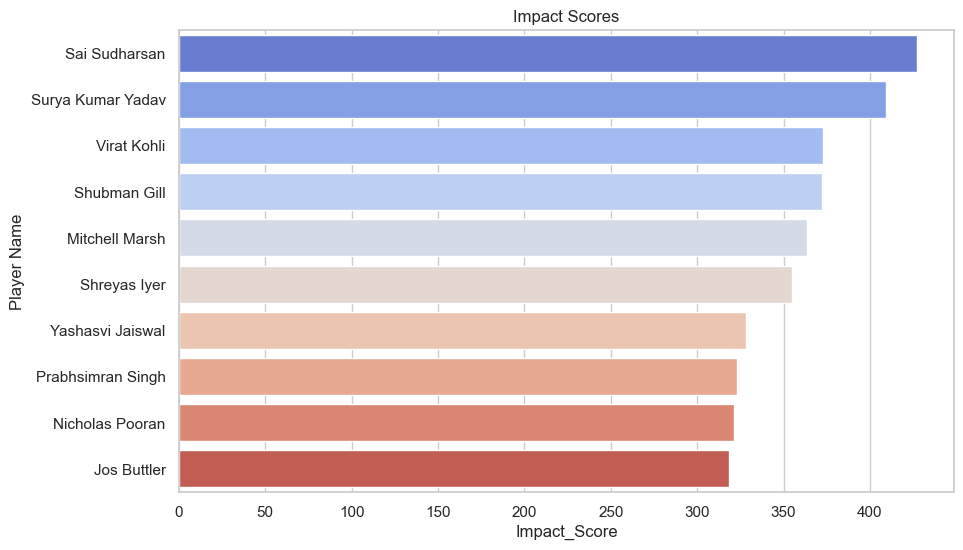

In [23]:
# Players based on Impact_Scores
sns.barplot(x='Impact_Score', y='Player Name',data = top_player,palette ='coolwarm',hue='Player Name')
plt.title('Impact Scores')


In [24]:
#  Most Six hitters
most_six = df.sort_values(by='6s',ascending =False).head(10)
most_six

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s,Impact_Score
10,Nicholas Pooran,LSG,524,14,14,2,87,43.67,267,196.25,0,5,45,40,321.375
5,Shreyas Iyer,PBKS,604,17,17,5,97,50.33,345,175.07,0,6,43,39,355.121
1,Surya Kumar Yadav,MI,717,16,16,5,73,65.18,427,167.91,0,5,69,38,409.373
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,363.460
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30,323.056
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28,328.013
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,1,2,46,28,277.967
17,Riyan Parag,RR,393,14,14,2,95,32.75,236,166.52,0,1,27,27,246.556
11,Heinrich Klaasen,SRH,487,13,13,2,105,44.27,282,172.69,1,1,42,25,295.657
12,Priyansh Arya,PBKS,475,17,17,0,103,27.94,265,179.24,1,2,55,25,291.722


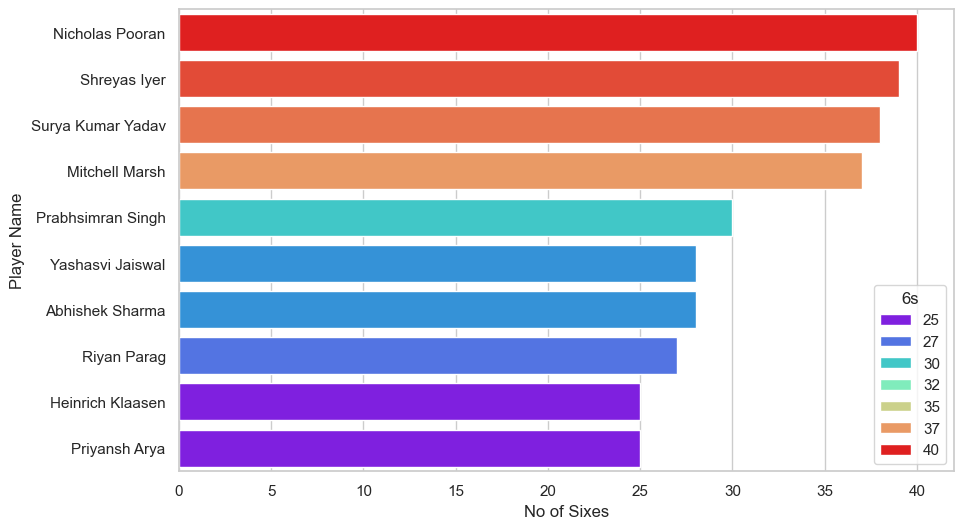

In [25]:
sns.barplot(x='6s', y = 'Player Name', data = most_six, hue= '6s',palette = 'rainbow')
plt.xlabel('No of Sixes')
plt.show()

In [26]:
# Teams hits most SIX
most_sixes = df.groupby('Team',as_index= False)['6s'].sum().sort_values(by='6s',ascending=False)
most_sixes

,Team,6s
6,PBKS,173
4,LSG,152
8,RR,146
5,MI,142
7,RCB,125
2,GT,124
9,SRH,120
1,DC,109
0,CSK,102
3,KKR,101


Text(0.5, 1.0, 'Sixes Hit by Teams')

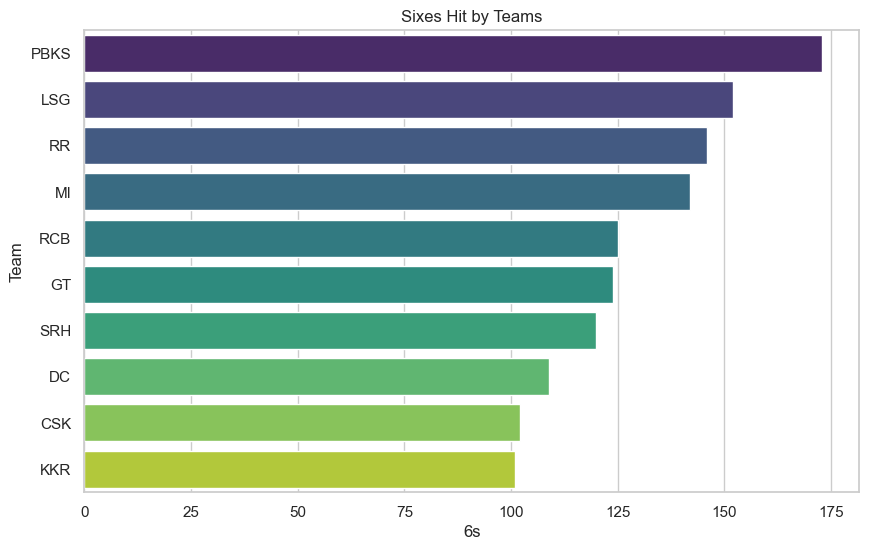

In [27]:
sns.barplot(y='Team' , x='6s', data = most_sixes, hue='Team',palette = 'viridis')
plt.title('Sixes Hit by Teams')